In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AOML_PROJ/aoml_boat.csv')
data.head()

,Unnamed: 0,Product_name,Sale_price,Discount_percent,Original_price,Average_stars,Reviews,Additional_offer
0,0,TRebel Wave Call,1799,77,7990,0.0,20,₹15 Extra Discount on UPI
1,1,TRebel Rockerz 235 V2,1199,60,2990,4.8,552,₹15 Extra Discount on UPI
2,2,BassHeads 103,499,61,1290,4.8,3,Free Shipping available
3,3,Rockerz 195 Pro,1199,40,1990,5.0,47,₹15 Extra Discount on UPI
4,4,BassHeads 122,499,61,1290,4.9,64,Free Shipping available


In [ ]:
data = data.drop(['Unnamed: 0'],axis=1)


In [ ]:
data

,Product_name,Sale_price,Discount_percent,Original_price,Average_stars,Reviews,Additional_offer
0,TRebel Wave Call,1799,77,7990,0.0,20,₹15 Extra Discount on UPI
1,TRebel Rockerz 235 V2,1199,60,2990,4.8,552,₹15 Extra Discount on UPI
2,BassHeads 103,499,61,1290,4.8,3,Free Shipping available
3,Rockerz 195 Pro,1199,40,1990,5.0,47,₹15 Extra Discount on UPI
4,BassHeads 122,499,61,1290,4.9,64,Free Shipping available
...,...,...,...,...,...,...,...
354,Aavante Bar Tune,3999,50,7990,0.0,8,₹15 Extra Discount on UPI
355,Aavante Bar Rhythm,3999,50,7990,0.0,12,₹15 Extra Discount on UPI
356,Rockerz 450 POLO,1499,62,3990,0.0,7,₹15 Extra Discount on UPI
357,TRebel Airdopes Atom 81,1499,57,3490,0.0,12,₹15 Extra Discount on UPI


## Data Preprocessing

In [ ]:
data.shape[0]

359

In [ ]:
data.isnull().sum()

Product_name        0
Sale_price          0
Discount_percent    0
Original_price      0
Average_stars       0
Reviews             0
Additional_offer    0
dtype: int64

No NULL values

In [ ]:
data.nunique().sort_values()

Additional_offer      2
Average_stars         8
Original_price       52
Discount_percent     53
Sale_price           71
Reviews              75
Product_name        357
dtype: int64

In [ ]:
df_copy = data.copy()

In [ ]:
#Excluding categorical features:
df = data.drop(['Product_name','Additional_offer'],axis=1)
df

,Sale_price,Discount_percent,Original_price,Average_stars,Reviews
0,1799,77,7990,0.0,20
1,1199,60,2990,4.8,552
2,499,61,1290,4.8,3
3,1199,40,1990,5.0,47
4,499,61,1290,4.9,64
...,...,...,...,...,...
354,3999,50,7990,0.0,8
355,3999,50,7990,0.0,12
356,1499,62,3990,0.0,7
357,1499,57,3490,0.0,12


In [ ]:
col_names = df.columns
col_names

Index(['Sale_price', 'Discount_percent', 'Original_price', 'Average_stars',
       'Reviews'],
      dtype='object')

# ELBOW METHOD

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new = scaler.fit_transform(df)

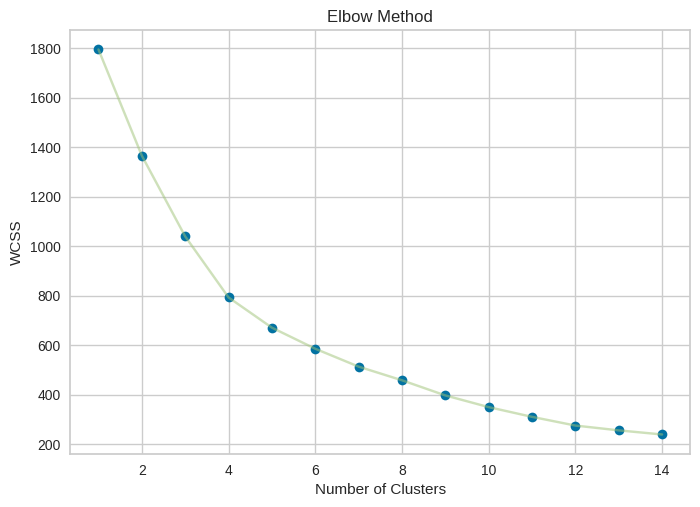

In [ ]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(new)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

# SILHOUETTE ANALYSIS

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]

In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster,n_init=10)
    kmeans.fit(new)
    labels = kmeans.predict(new)
    print(n_cluster, silhouette_score(new,labels))

2 0.5443262417594279
3 0.3903365061004968
4 0.41579080342453995
5 0.3295322530032885
6 0.340195941117025


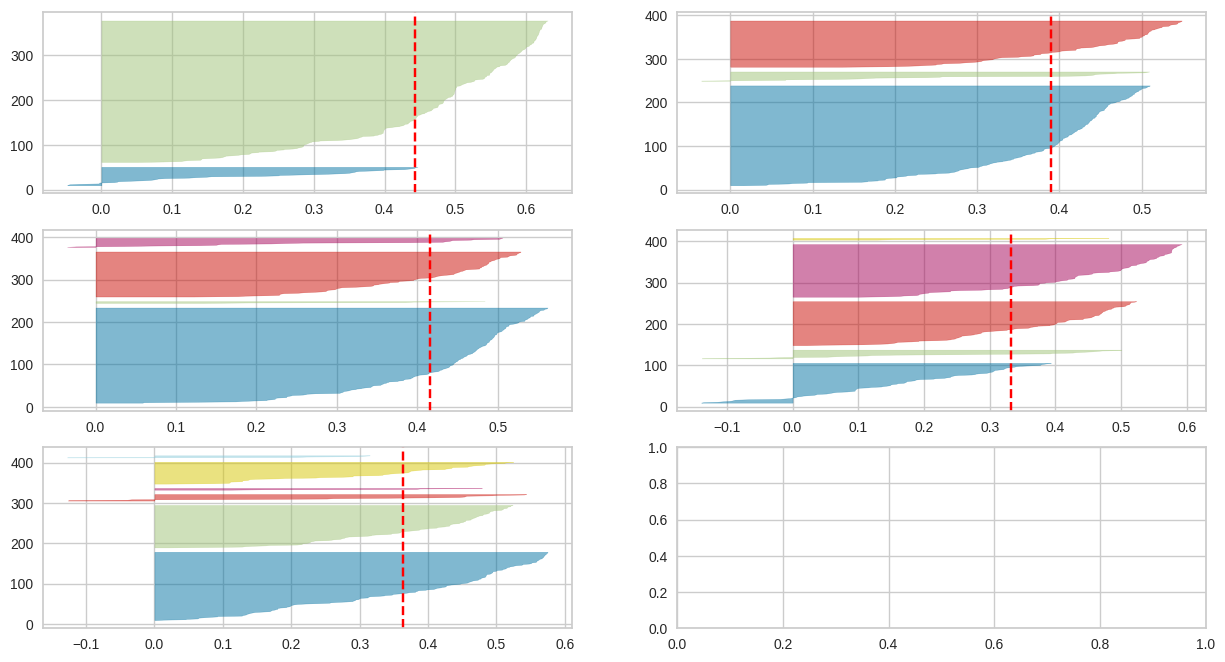

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

#Creating Silhouette visualizations

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new)

# Trying with 3 clusters

In [ ]:
new

array([[-0.11316203,  1.85250285,  0.74158845, -1.41700563, -0.07125029],
       [-0.39914735,  0.47256572, -0.37839074,  0.67356295,  6.99414402],
       [-0.73279689,  0.55373849, -0.75918367,  0.67356295, -0.29702416],
       ...,
       [-0.25615469,  0.63491127, -0.1543949 , -1.41700563, -0.2439009 ],
       [-0.25615469,  0.2290474 , -0.26639282, -1.41700563, -0.17749682],
       [-0.01783359, -0.90737141, -0.26437686, -1.41700563, -0.164216  ]])

In [ ]:
k_clust = KMeans(n_clusters = 3, random_state = 42)
pred = k_clust.fit_predict(new)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,

In [ ]:
labels = np.unique(pred)
labels

array([0, 1, 2], dtype=int32)

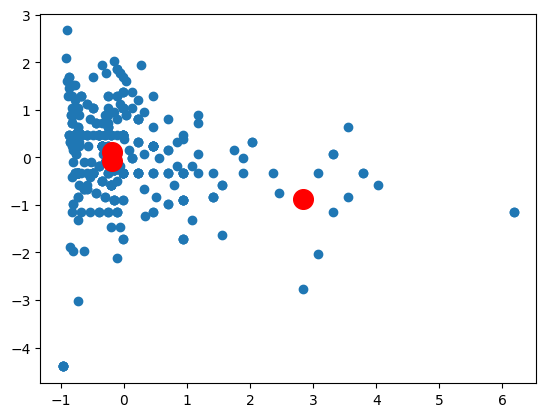

In [ ]:
plt.scatter(new[:,0],
            new[:,1])

# Plot the clusters with centroids
plt.scatter(k_clust.cluster_centers_[:, 0],
            k_clust.cluster_centers_[:, 1],
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

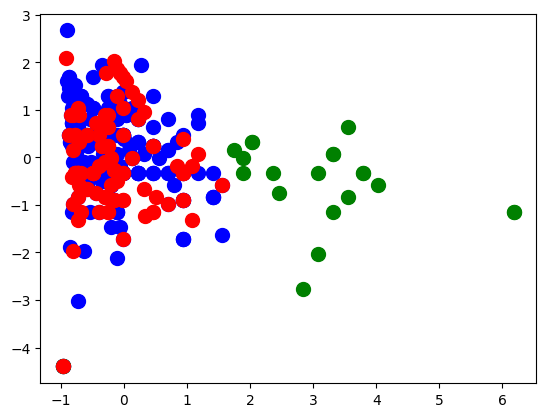

In [ ]:
plt.scatter(new[pred == 0, 0], new[pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(new[pred == 1, 0], new[pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(new[pred== 2, 0], new[pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster

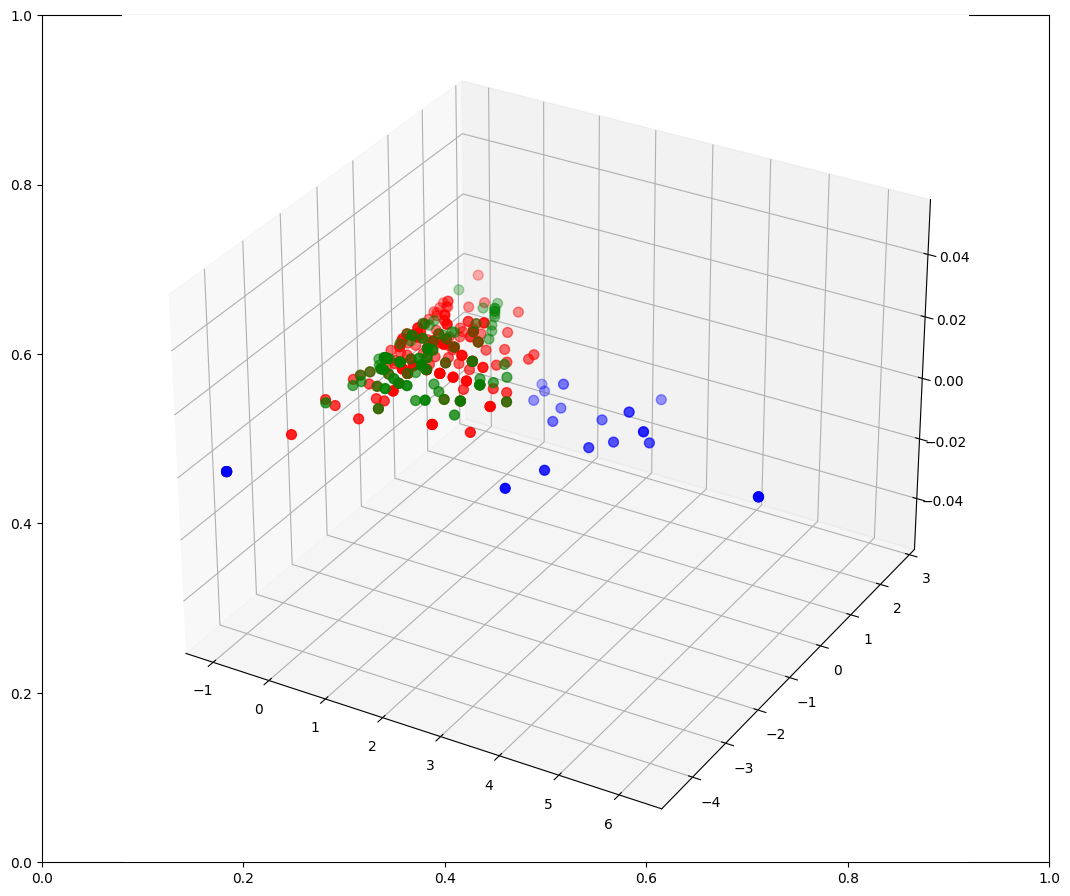

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(new[pred == 0,0],new[pred == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(new[pred == 1,0], new[pred == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(new[pred == 2,0], new[pred == 2,1], s= 50, c= 'green', label= 'Cluster 3')

# Trying out with 2 clusters

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters = 2,max_iter=300,random_state=42)
klabel = kmeans.fit_predict(scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = np.unique(klabel)
labels

array([0, 1], dtype=int32)

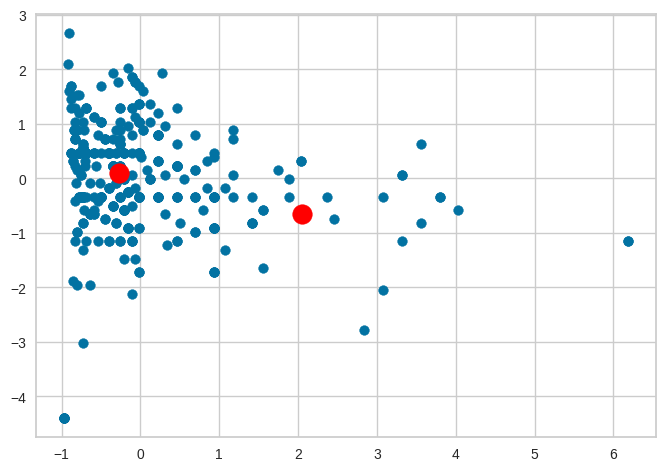

In [ ]:
plt.scatter(scaled[:,0],
            scaled[:,1])

# Plot the clusters with centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

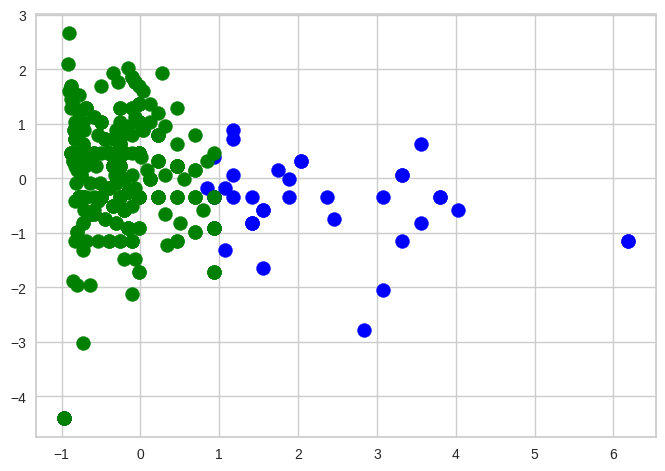

In [ ]:
plt.scatter(scaled[klabel == 0, 0], scaled[klabel == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(scaled[klabel == 1, 0], scaled[klabel == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(scaled[klabel == 2, 0], scaled[klabel == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for first cluster
plt.scatter(scaled[klabel == 3, 0], scaled[klabel == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4') #for second cluster

In [ ]:
# converting preditcions into a df
cluster = pd.DataFrame(data=klabel, dtype=int)
cluster.columns = ['k_cluster']

# predictions as a df
print(cluster.shape)
cluster.head()

(359, 1)


,k_cluster
0,1
1,1
2,1
3,1
4,1


In [ ]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_copy, cluster], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(359, 8)


,Product_name,Sale_price,Discount_percent,Original_price,Average_stars,Reviews,Additional_offer,k_cluster
0,TRebel Wave Call,1799,77,7990,0.0,20,₹15 Extra Discount on UPI,1
1,TRebel Rockerz 235 V2,1199,60,2990,4.8,552,₹15 Extra Discount on UPI,1
2,BassHeads 103,499,61,1290,4.8,3,Free Shipping available,1
3,Rockerz 195 Pro,1199,40,1990,5.0,47,₹15 Extra Discount on UPI,1
4,BassHeads 122,499,61,1290,4.9,64,Free Shipping available,1


In [ ]:
#Number of products in each cluster
df_cluster['k_cluster'].value_counts()

1    317
0     42
Name: k_cluster, dtype: int64

In [ ]:
# checking the products in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Sale_price,42.0,6339.523810,3127.984742,0.0,4349.00,5299.0,8499.0,14999.0
Discount_percent,42.0,46.023810,13.572727,0.0,43.25,50.0,53.5,65.0
Original_price,42.0,13747.928571,6122.038929,6990.0,8990.00,11994.5,16990.0,30979.0
Average_stars,42.0,2.190476,2.444687,0.0,0.00,0.0,4.9,5.0
Reviews,42.0,11.976190,12.911496,1.0,3.00,8.5,17.0,62.0
k_cluster,42.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [ ]:
df_cluster.loc[df_cluster['k_cluster'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Sale_price,317.0,1466.287066,971.576888,0.0,549.0,1399.0,1999.0,3999.0
Discount_percent,317.0,55.258675,11.768977,0.0,50.0,57.0,62.0,87.0
Original_price,317.0,3477.750789,2323.985216,333.0,1299.0,2990.0,4990.0,11990.0
Average_stars,317.0,3.394322,2.245791,0.0,0.0,4.8,5.0,5.0
Reviews,317.0,27.138801,79.952832,0.0,4.0,9.0,19.0,1067.0
k_cluster,317.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
